In [1]:
#%matplotlib notebook

In [2]:
# Main Code for Data 
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np

# File to Load (Remember to Change These)
final_data = "final_file.csv"
sales_data = 'sales.csv'

# Read Purchasing File and store into Pandas data frame
graph_df = pd.read_csv(final_data)
sales_df = pd.read_csv(sales_data)
graph_df.head()

,MonthYear,Sales,Price Per Gallon,Unemployment_Rate
0,Jan-2005,1052224.0,1.831,5.3
1,Feb-2005,1244753.0,1.910,5.4
2,Mar-2005,1564938.0,2.079,5.2
3,Apr-2005,1493837.0,2.243,5.2
4,May-2005,1488171.0,2.161,5.1


In [3]:
graph_df.dropna(how='all')
graph_df.head()

,MonthYear,Sales,Price Per Gallon,Unemployment_Rate
0,Jan-2005,1052224.0,1.831,5.3
1,Feb-2005,1244753.0,1.910,5.4
2,Mar-2005,1564938.0,2.079,5.2
3,Apr-2005,1493837.0,2.243,5.2
4,May-2005,1488171.0,2.161,5.1


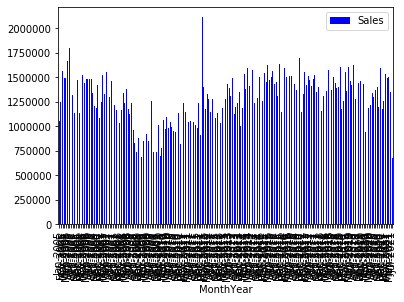

In [4]:
graph_df.plot(kind ='bar', x='MonthYear', y='Sales', color = 'blue')
plt.show()

In [5]:
mean_gas_df = graph_df.groupby('MonthYear').mean()['Price Per Gallon']
mean_gas_df.head()

MonthYear
Apr-2005    2.243
Apr-2006    2.742
Apr-2007    2.845
Apr-2008    3.458
Apr-2009    2.049
Name: Price Per Gallon, dtype: float64

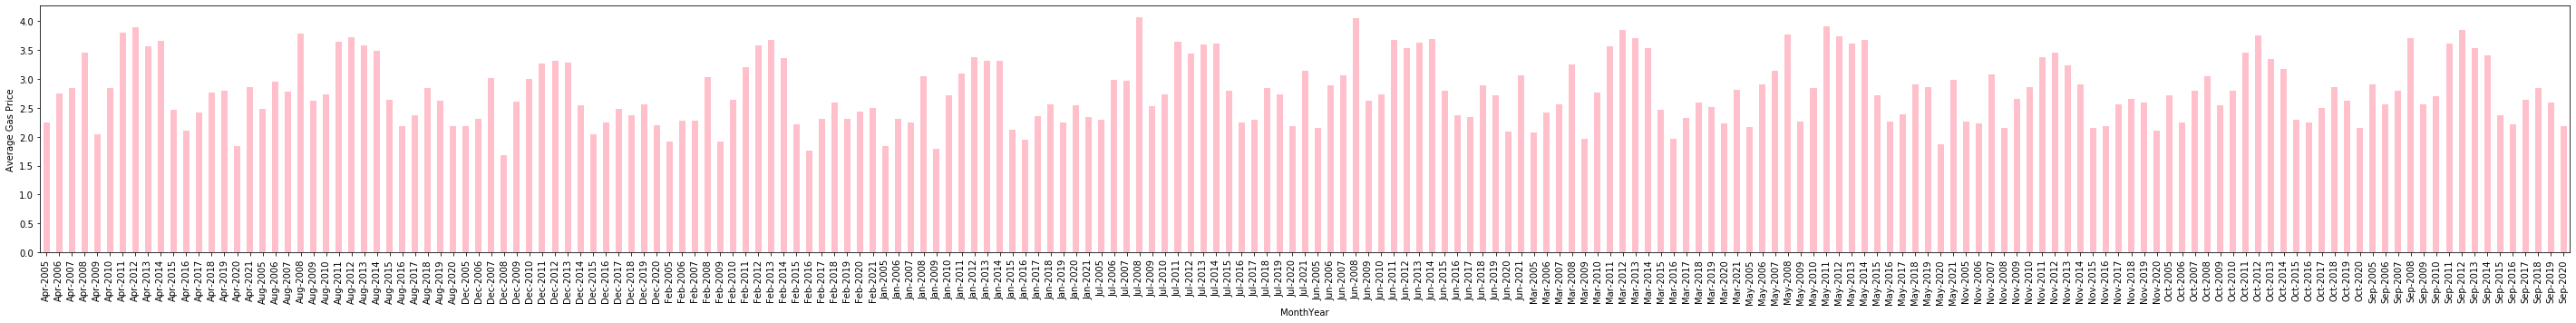

In [6]:
mean_gas_df.plot(kind = "bar", color='pink', figsize=(50,5))
plt.xlabel("MonthYear")
plt.xticks(rotation=90)
plt.ylabel("Average Gas Price")
plt.show()

In [8]:
mean_sales_df = graph_df.groupby('MonthYear').mean()['Sales']
mean_sales_df

MonthYear
Apr-2005    1493837.0
Apr-2006    1439311.0
Apr-2007    1326837.0
Apr-2008    1237336.0
Apr-2009     822746.0
              ...    
Sep-2016    1428354.0
Sep-2017    1523050.0
Sep-2018    1440820.0
Sep-2019    1282712.0
Sep-2020    1370243.0
Name: Sales, Length: 199, dtype: float64

In [9]:
mean_unemploy_df = graph_df.groupby('MonthYear').mean()['Unemployment_Rate']
mean_unemploy_df

MonthYear
Apr-2005    5.2
Apr-2006    4.7
Apr-2007    4.5
Apr-2008    5.0
Apr-2009    9.0
           ... 
Sep-2016    5.0
Sep-2017    4.2
Sep-2018    3.7
Sep-2019    3.5
Sep-2020    7.8
Name: Unemployment_Rate, Length: 199, dtype: float64

In [10]:
summary_mean_df = pd.DataFrame({"Average Gas Price":mean_gas_df,
                              "Average Sales Price":mean_sales_df,
                              "Average Unempoloyment Rate":mean_unemploy_df})
summary_mean_df.head()

,Average Gas Price,Average Sales Price,Average Unempoloyment Rate
MonthYear,,,
Apr-2005,2.243,1493837.0,5.2
Apr-2006,2.742,1439311.0,4.7
Apr-2007,2.845,1326837.0,4.5
Apr-2008,3.458,1237336.0,5.0
Apr-2009,2.049,822746.0,9.0


In [11]:
summary_mean_df.columns

Index(['Average Gas Price', 'Average Sales Price',
       'Average Unempoloyment Rate'],
      dtype='object')

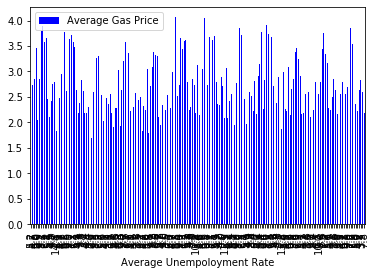

In [12]:
summary_mean_df.plot(kind ='bar', x='Average Unempoloyment Rate', y='Average Gas Price', color = 'blue')
plt.show()

In [13]:
sales_df.head()

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2005,"1,052,224","1,244,753","1,564,938","1,493,837","1,488,171","1,671,401","1,795,944","1,474,130","1,321,156","1,139,217","1,160,447","1,475,649"
1,2006,"1,136,538","1,253,271","1,519,952","1,439,311","1,478,735","1,487,688","1,480,504","1,478,072","1,342,543","1,205,973","1,188,344","1,419,758"
2,2007,"1,079,891","1,244,375","1,528,582","1,326,837","1,550,609","1,433,282","1,302,661","1,467,601","1,305,275","1,221,485","1,170,035","1,377,542"
3,2008,"1,036,540","1,162,277","1,339,158","1,237,336","1,383,754","1,176,765","1,126,477","1,240,785","959,127","829,396","737,978","884,306"
4,2009,"650,608","681,676","847,002","822,746","919,295","850,654","991,950","1,254,982","740,394","832,953","741,826","1,013,629"


In [14]:
sales_df.dropna(how='all')
sales_df

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2005,"1,052,224","1,244,753","1,564,938","1,493,837","1,488,171","1,671,401","1,795,944","1,474,130","1,321,156","1,139,217","1,160,447","1,475,649"
1,2006,"1,136,538","1,253,271","1,519,952","1,439,311","1,478,735","1,487,688","1,480,504","1,478,072","1,342,543","1,205,973","1,188,344","1,419,758"
2,2007,"1,079,891","1,244,375","1,528,582","1,326,837","1,550,609","1,433,282","1,302,661","1,467,601","1,305,275","1,221,485","1,170,035","1,377,542"
3,2008,"1,036,540","1,162,277","1,339,158","1,237,336","1,383,754","1,176,765","1,126,477","1,240,785","959,127","829,396","737,978","884,306"
4,2009,"650,608","681,676","847,002","822,746","919,295","850,654","991,950","1,254,982","740,394","832,953","741,826","1,013,629"
5,2010,"693,531","774,108","1,059,134","976,345","1,096,910","978,154","1,045,915","993,211","953,837","940,740","863,198","1,135,333"
6,2011,"815,408","987,265","1,238,252","1,149,240","1,052,417","1,044,037","1,055,231","1,067,895","1,048,158","1,015,016","986,664","1,236,129"
7,2012,"909,806","2,115,420","1,398,128","1,177,478","1,327,521","1,276,629","1,141,761","1,274,193","1,183,825","1,085,804","1,137,862","1,347,837"
8,2013,"1,037,967","1,185,746","1,444,773","1,276,318","1,434,096","1,396,038","1,306,885","1,494,273","1,128,124","1,198,989","1,236,413","1,350,623"
9,2014,"1,006,049","1,186,038","1,529,348","1,381,300","1,598,730","1,412,565","1,427,029","1,575,971","1,239,405","1,275,657","1,291,817","1,500,108"


In [15]:
sales_df = sales_df.astype(str)
sales_df = sales_df.replace({',':''}, regex=True)

In [16]:
sales_df

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2005,1052224,1244753,1564938,1493837,1488171,1671401,1795944,1474130,1321156,1139217,1160447,1475649
1,2006,1136538,1253271,1519952,1439311,1478735,1487688,1480504,1478072,1342543,1205973,1188344,1419758
2,2007,1079891,1244375,1528582,1326837,1550609,1433282,1302661,1467601,1305275,1221485,1170035,1377542
3,2008,1036540,1162277,1339158,1237336,1383754,1176765,1126477,1240785,959127,829396,737978,884306
4,2009,650608,681676,847002,822746,919295,850654,991950,1254982,740394,832953,741826,1013629
5,2010,693531,774108,1059134,976345,1096910,978154,1045915,993211,953837,940740,863198,1135333
6,2011,815408,987265,1238252,1149240,1052417,1044037,1055231,1067895,1048158,1015016,986664,1236129
7,2012,909806,2115420,1398128,1177478,1327521,1276629,1141761,1274193,1183825,1085804,1137862,1347837
8,2013,1037967,1185746,1444773,1276318,1434096,1396038,1306885,1494273,1128124,1198989,1236413,1350623
9,2014,1006049,1186038,1529348,1381300,1598730,1412565,1427029,1575971,1239405,1275657,1291817,1500108


In [17]:
sales_df.columns

Index(['Month', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [18]:
new_data_df = sales_df.drop(['Month'], axis = 1)
new_data_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1052224,1244753,1564938,1493837,1488171,1671401,1795944,1474130,1321156,1139217,1160447,1475649
1,1136538,1253271,1519952,1439311,1478735,1487688,1480504,1478072,1342543,1205973,1188344,1419758
2,1079891,1244375,1528582,1326837,1550609,1433282,1302661,1467601,1305275,1221485,1170035,1377542
3,1036540,1162277,1339158,1237336,1383754,1176765,1126477,1240785,959127,829396,737978,884306
4,650608,681676,847002,822746,919295,850654,991950,1254982,740394,832953,741826,1013629
5,693531,774108,1059134,976345,1096910,978154,1045915,993211,953837,940740,863198,1135333
6,815408,987265,1238252,1149240,1052417,1044037,1055231,1067895,1048158,1015016,986664,1236129
7,909806,2115420,1398128,1177478,1327521,1276629,1141761,1274193,1183825,1085804,1137862,1347837
8,1037967,1185746,1444773,1276318,1434096,1396038,1306885,1494273,1128124,1198989,1236413,1350623
9,1006049,1186038,1529348,1381300,1598730,1412565,1427029,1575971,1239405,1275657,1291817,1500108


In [19]:
new_data2_df= new_data_df.transpose(copy=False)
new_data2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Jan,1052224,1136538,1079891,1036540,650608,693531,815408,909806,1037967,1006049,1149107,1147705,1140841,1156581,1172653,1157415,1174053
Feb,1244753,1253271,1244375,1162277,681676,774108,987265,2115420,1185746,1186038,1254709,1340801,1331716,1305932,1257589,1434716,1256529
Mar,1564938,1519952,1528582,1339158,847002,1059134,1238252,1398128,1444773,1529348,1540724,1590701,1553142,1657716,1552126,944850,1536038
Apr,1493837,1439311,1326837,1237336,822746,976345,1149240,1177478,1276318,1381300,1449812,1501379,1424793,1364619,1355548,563122,1493938
May,1488171,1478735,1550609,1383754,919295,1096910,1052417,1327521,1434096,1598730,1629328,1520463,1517197,1576158,1606260,1181756,1502642
Jun,1671401,1487688,1433282,1176765,850654,978154,1044037,1276629,1396038,1412565,1471074,1508662,1472495,1549950,1462664,1214706,1352285
Jul,1795944,1480504,1302661,1126477,991950,1045915,1055231,1141761,1306885,1427029,1507307,1517151,1415051,1373655,1417418,1336267,680083
Aug,1474130,1478072,1467601,1240785,1254982,993211,1067895,1274193,1494273,1575971,1568896,1508095,1480526,1500121,1628577,1298489,0
Sep,1321156,1342543,1305275,959127,740394,953837,1048158,1183825,1128124,1239405,1435728,1428354,1523050,1440820,1282712,1370243,0
Oct,1139217,1205973,1221485,829396,832953,940740,1015016,1085804,1198989,1275657,1449359,1368064,1353586,1393137,1384010,1398735,0


In [20]:
new_data2_df.columns

RangeIndex(start=0, stop=17, step=1)

In [21]:
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[0]: '2005'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[1]: '2006'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[2]: '2007'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[3]: '2008'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[4]: '2009'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[5]: '2010'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[6]: '2011'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[7]: '2012'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[8]: '2013'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[9]: '2014'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[10]: '2015'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[11]: '2016'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[12]: '2017'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[13]: '2018'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[14]: '2019'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[15]: '2020'})
new_data2_df = new_data2_df.rename(columns={new_data2_df.columns[16]: '2021'})

In [22]:
new_data2_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Jan,1052224,1136538,1079891,1036540,650608,693531,815408,909806,1037967,1006049,1149107,1147705,1140841,1156581,1172653,1157415,1174053
Feb,1244753,1253271,1244375,1162277,681676,774108,987265,2115420,1185746,1186038,1254709,1340801,1331716,1305932,1257589,1434716,1256529
Mar,1564938,1519952,1528582,1339158,847002,1059134,1238252,1398128,1444773,1529348,1540724,1590701,1553142,1657716,1552126,944850,1536038
Apr,1493837,1439311,1326837,1237336,822746,976345,1149240,1177478,1276318,1381300,1449812,1501379,1424793,1364619,1355548,563122,1493938
May,1488171,1478735,1550609,1383754,919295,1096910,1052417,1327521,1434096,1598730,1629328,1520463,1517197,1576158,1606260,1181756,1502642
Jun,1671401,1487688,1433282,1176765,850654,978154,1044037,1276629,1396038,1412565,1471074,1508662,1472495,1549950,1462664,1214706,1352285
Jul,1795944,1480504,1302661,1126477,991950,1045915,1055231,1141761,1306885,1427029,1507307,1517151,1415051,1373655,1417418,1336267,680083
Aug,1474130,1478072,1467601,1240785,1254982,993211,1067895,1274193,1494273,1575971,1568896,1508095,1480526,1500121,1628577,1298489,0
Sep,1321156,1342543,1305275,959127,740394,953837,1048158,1183825,1128124,1239405,1435728,1428354,1523050,1440820,1282712,1370243,0
Oct,1139217,1205973,1221485,829396,832953,940740,1015016,1085804,1198989,1275657,1449359,1368064,1353586,1393137,1384010,1398735,0


In [23]:
clean_data_df= new_data2_df.dropna(how='all')
clean_data_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Jan,1052224,1136538,1079891,1036540,650608,693531,815408,909806,1037967,1006049,1149107,1147705,1140841,1156581,1172653,1157415,1174053
Feb,1244753,1253271,1244375,1162277,681676,774108,987265,2115420,1185746,1186038,1254709,1340801,1331716,1305932,1257589,1434716,1256529
Mar,1564938,1519952,1528582,1339158,847002,1059134,1238252,1398128,1444773,1529348,1540724,1590701,1553142,1657716,1552126,944850,1536038
Apr,1493837,1439311,1326837,1237336,822746,976345,1149240,1177478,1276318,1381300,1449812,1501379,1424793,1364619,1355548,563122,1493938
May,1488171,1478735,1550609,1383754,919295,1096910,1052417,1327521,1434096,1598730,1629328,1520463,1517197,1576158,1606260,1181756,1502642
Jun,1671401,1487688,1433282,1176765,850654,978154,1044037,1276629,1396038,1412565,1471074,1508662,1472495,1549950,1462664,1214706,1352285
Jul,1795944,1480504,1302661,1126477,991950,1045915,1055231,1141761,1306885,1427029,1507307,1517151,1415051,1373655,1417418,1336267,680083
Aug,1474130,1478072,1467601,1240785,1254982,993211,1067895,1274193,1494273,1575971,1568896,1508095,1480526,1500121,1628577,1298489,0
Sep,1321156,1342543,1305275,959127,740394,953837,1048158,1183825,1128124,1239405,1435728,1428354,1523050,1440820,1282712,1370243,0
Oct,1139217,1205973,1221485,829396,832953,940740,1015016,1085804,1198989,1275657,1449359,1368064,1353586,1393137,1384010,1398735,0


In [24]:
clean_data_df.dtypes

2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
2021    object
dtype: object

In [25]:
change_data_df = clean_data_df.astype(float)
change_data_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Jan,1052224.0,1136538.0,1079891.0,1036540.0,650608.0,693531.0,815408.0,909806.0,1037967.0,1006049.0,1149107.0,1147705.0,1140841.0,1156581.0,1172653.0,1157415.0,1174053.0
Feb,1244753.0,1253271.0,1244375.0,1162277.0,681676.0,774108.0,987265.0,2115420.0,1185746.0,1186038.0,1254709.0,1340801.0,1331716.0,1305932.0,1257589.0,1434716.0,1256529.0
Mar,1564938.0,1519952.0,1528582.0,1339158.0,847002.0,1059134.0,1238252.0,1398128.0,1444773.0,1529348.0,1540724.0,1590701.0,1553142.0,1657716.0,1552126.0,944850.0,1536038.0
Apr,1493837.0,1439311.0,1326837.0,1237336.0,822746.0,976345.0,1149240.0,1177478.0,1276318.0,1381300.0,1449812.0,1501379.0,1424793.0,1364619.0,1355548.0,563122.0,1493938.0
May,1488171.0,1478735.0,1550609.0,1383754.0,919295.0,1096910.0,1052417.0,1327521.0,1434096.0,1598730.0,1629328.0,1520463.0,1517197.0,1576158.0,1606260.0,1181756.0,1502642.0
Jun,1671401.0,1487688.0,1433282.0,1176765.0,850654.0,978154.0,1044037.0,1276629.0,1396038.0,1412565.0,1471074.0,1508662.0,1472495.0,1549950.0,1462664.0,1214706.0,1352285.0
Jul,1795944.0,1480504.0,1302661.0,1126477.0,991950.0,1045915.0,1055231.0,1141761.0,1306885.0,1427029.0,1507307.0,1517151.0,1415051.0,1373655.0,1417418.0,1336267.0,680083.0
Aug,1474130.0,1478072.0,1467601.0,1240785.0,1254982.0,993211.0,1067895.0,1274193.0,1494273.0,1575971.0,1568896.0,1508095.0,1480526.0,1500121.0,1628577.0,1298489.0,0.0
Sep,1321156.0,1342543.0,1305275.0,959127.0,740394.0,953837.0,1048158.0,1183825.0,1128124.0,1239405.0,1435728.0,1428354.0,1523050.0,1440820.0,1282712.0,1370243.0,0.0
Oct,1139217.0,1205973.0,1221485.0,829396.0,832953.0,940740.0,1015016.0,1085804.0,1198989.0,1275657.0,1449359.0,1368064.0,1353586.0,1393137.0,1384010.0,1398735.0,0.0


In [26]:
change_data_df.dtypes

2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
dtype: object

In [29]:
sum05_df = change_data_df["2005"].sum()
sum06_df = change_data_df["2006"].sum()
sum07_df = change_data_df["2007"].sum()
sum08_df = change_data_df["2008"].sum()
sum09_df = change_data_df["2009"].sum()
sum10_df = change_data_df["2010"].sum()
sum11_df = change_data_df["2011"].sum()
sum12_df = change_data_df["2012"].sum()
sum13_df = change_data_df["2013"].sum()
sum14_df = change_data_df["2014"].sum()
sum15_df = change_data_df["2015"].sum()
sum16_df = change_data_df["2016"].sum()
sum17_df = change_data_df["2017"].sum()
sum18_df = change_data_df["2018"].sum()
sum19_df = change_data_df["2019"].sum()
sum20_df = change_data_df["2020"].sum()
sum21_df = change_data_df["2021"].sum()

In [28]:
avg05_df = change_data_df["2005"].mean()
avg05_df

1406822.25

In [44]:
sum_year_df = pd.DataFrame({"total 2005":[sum05_df], 
                            "total 2006":sum06_df,
                            "total 2007":sum07_df,
                           "total 2008":sum08_df,
                           "total 2009":sum09_df,
                           "total 2010":sum10_df,
                           "total 2011":sum11_df,
                           "total 2012":sum12_df,
                           "total 2013":sum13_df,
                           "total 2014":sum14_df,
                           "total 2015":sum15_df,
                           "total 2016":sum16_df,
                           "total 2017":sum17_df,
                           "total 2018":sum18_df,
                           "total 2019":sum19_df,
                           "total 2020":sum20_df,
                           "total 2021":sum21_df})
sum_year_df.head()

,total 2005,total 2006,total 2007,total 2008,total 2009,total 2010,total 2011,total 2012,total 2013,total 2014,total 2015,total 2016,total 2017,total 2018,total 2019,total 2020,total 2021
0,16881867.0,16430689.0,16008175.0,13113899.0,10347715.0,11510416.0,12695712.0,15376264.0,15490245.0,16424017.0,17404970.0,17500719.0,17212565.0,17323849.0,17023894.0,14697837.0,8995568.0


In [45]:
roata_sum_df = sum_year_df.T
roata_sum_df

,0
total 2005,16881867.0
total 2006,16430689.0
total 2007,16008175.0
total 2008,13113899.0
total 2009,10347715.0
total 2010,11510416.0
total 2011,12695712.0
total 2012,15376264.0
total 2013,15490245.0
total 2014,16424017.0


In [46]:
roata_sum_df.columns


RangeIndex(start=0, stop=1, step=1)

In [47]:
roata_sum_df = roata_sum_df.rename(columns={roata_sum_df.columns[0]: 'Total Vehicle Production'})

roata_sum_df

,Total Vehicle Production
total 2005,16881867.0
total 2006,16430689.0
total 2007,16008175.0
total 2008,13113899.0
total 2009,10347715.0
total 2010,11510416.0
total 2011,12695712.0
total 2012,15376264.0
total 2013,15490245.0
total 2014,16424017.0


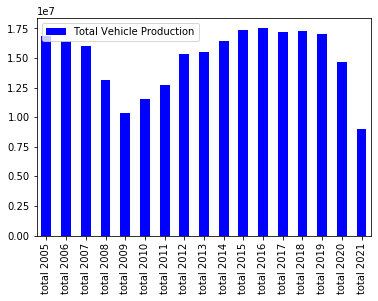

In [49]:
roata_sum_df.plot(kind ='bar',color = 'blue')
plt.show()

In [ ]:
#plt.savefig("Images/Average_Gas_Per_Month_Year.png")
#plt.show()